In [16]:
%matplotlib inline

In [40]:
from keras.layers import Input, Dense
from keras.models import Model


# this is the size of our encoded representations # Code size
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

layer1 = Dense(256, activation='relu')(input_img)

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(layer1)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(256)(encoded)

layer2 = Dense(784, activation='relu')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, layer2)

In [41]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [42]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer2(decoder_layer1(encoded_input)))

In [43]:
autoencoder.compile(optimizer='rmsprop', loss='mean_squared_error')

In [44]:
autoencoder.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_9 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_11 (Dense)             (None, 784)               201488    
Total params: 419,120
Trainable params: 419,120
Non-trainable params: 0
_________________________________________________________________


In [45]:
784/32

24.5

#### Model Training

In [46]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [47]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print ( x_train.shape )
print ( x_test.shape )

(60000, 784)
(10000, 784)


In [48]:
autoencoder.fit(x_train, 
                x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0321 - val_loss: 0.0184
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0188 - val_loss: 0.0180
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0166 - val_loss: 0.0155
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0155 - val_loss: 0.0148
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0146 - val_loss: 0.0134
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0140 - val_loss: 0.0129
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0135 - val_loss: 0.0145
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0131 - val_loss: 0.0132
Epoch 9/100
235/235 [==============================] - 2s 11ms/step - loss: 0.0127 - val_loss: 0.0119
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0124 - val_

235/235 [==============================] - 2s 8ms/step - loss: 0.0092 - val_loss: 0.0089
Epoch 82/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0092 - val_loss: 0.0096
Epoch 83/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0092 - val_loss: 0.0102
Epoch 84/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0092 - val_loss: 0.0088
Epoch 85/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0092 - val_loss: 0.0095
Epoch 86/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0092 - val_loss: 0.0089
Epoch 87/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0091 - val_loss: 0.0094
Epoch 88/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0091 - val_loss: 0.0090
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 90/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0091 - val_loss:

In [49]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [31]:
import matplotlib.pyplot as plt

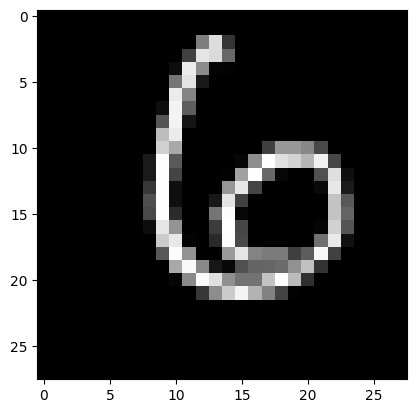

In [50]:
plt.imshow(x_test[100].reshape(28,28), cmap='gray')
plt.show()

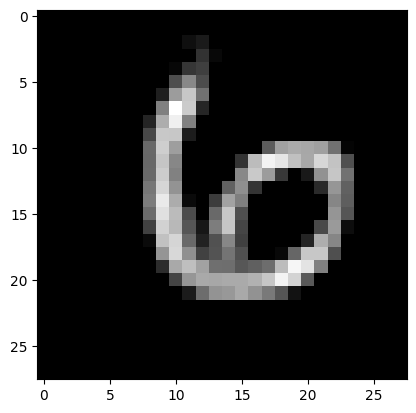

In [51]:
plt.imshow(decoded_imgs[100].reshape(28,28), cmap='gray')
plt.show()

In [29]:
encoded_imgs[0]

array([3.1127124 , 1.3009022 , 0.4684448 , 0.8714099 , 2.5000646 ,
       0.4531023 , 2.23847   , 3.0801585 , 1.7020136 , 3.2695148 ,
       0.8741158 , 0.31284136, 0.18936726, 1.453485  , 1.7050745 ,
       5.3412833 ], dtype=float32)

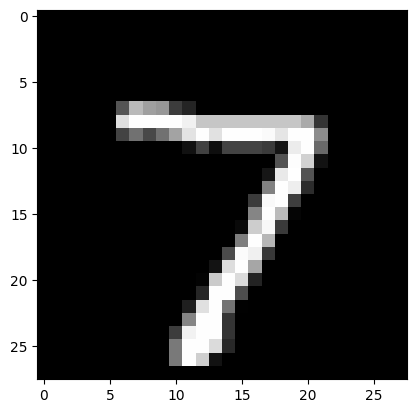

In [52]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.show()

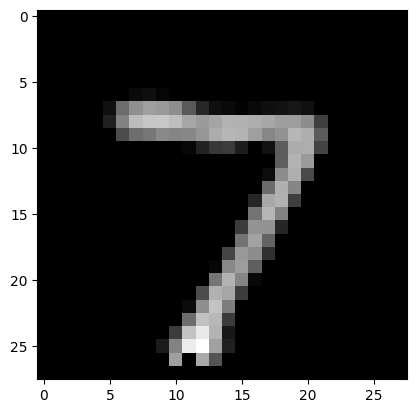

In [53]:
plt.imshow(decoded_imgs[0].reshape(28, 28), cmap='gray')
plt.show()

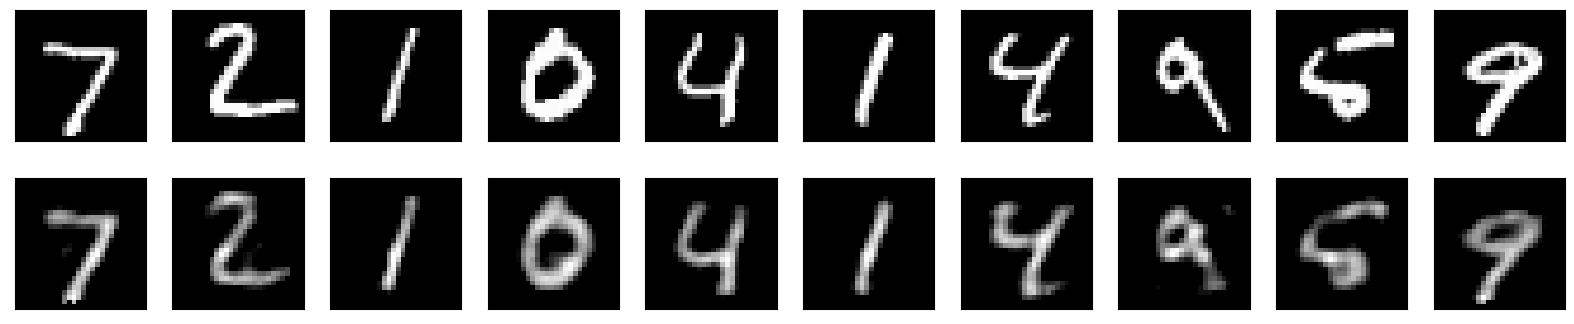

In [37]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

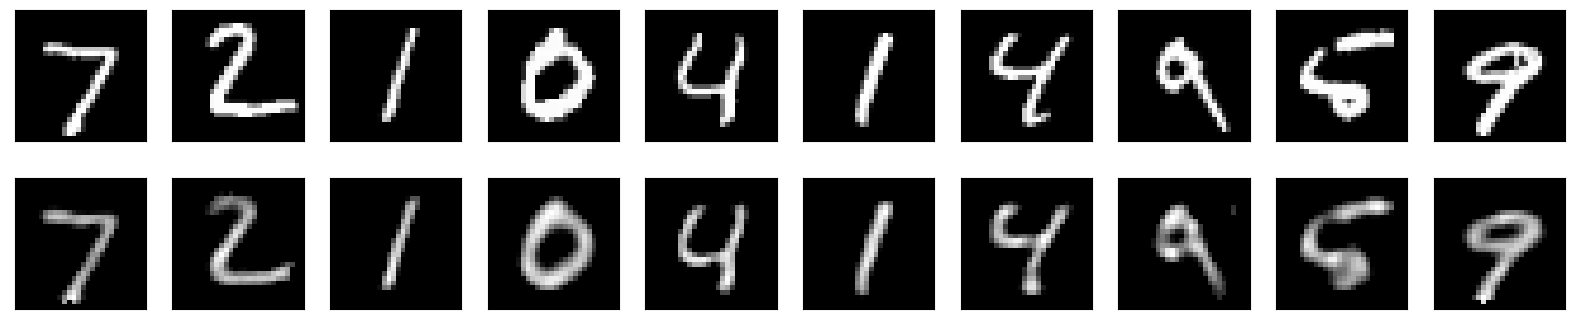

In [54]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()